### Generate a bathymetry file (as well as delx and dely files) with non uniform resolution and an extended downstream shelf (281 km)

Good bathymtery for rerunning


This notebook is based on the functions *make_arbitrary_topo_smooth*, *tanktopo*, *canyontopo* and *widthprofile* which were originally written by S. Allen, and modified by T. Howatt and J. Spurgin (They have been translated form python to matlab and here to python again). 

They have to be loaded from the module BathyPythonTools.py

K. Ramos Musalem

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

%matplotlib inline

In [3]:
import canyon_tools.bathy_tools as bat
import canyon_tools.savitzky_golay as sg

In [4]:
#Interpolating my alongshore(AS) spacing - x-direction
ASx_size = 361
x_vary=np.arange(0,ASx_size,1)


In [5]:
#What I am using for the linear part (200m spacing between 33,000 & 87000m)
ASx_linear = (0,45,315,360) # %/x_size
ASy_linear = (0,33.0e+3,87.0e+3,120.0e+3)
AS_linear = np.interp(x_vary,ASx_linear,ASy_linear) # donde quiero, donde esta, y lo que es
delx_AS_linear = (AS_linear[1:] - AS_linear[0:-1])

print (np.shape(delx_AS_linear))
#print (delx_AS_linear)


(360,)


(360,)


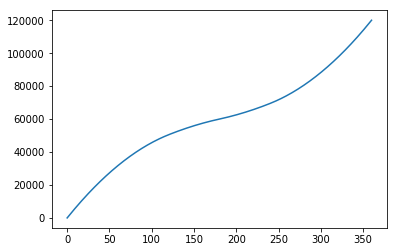

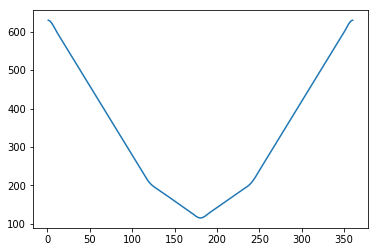

In [6]:
# x0-50 and x320-370
ASx_Boundaries = (0,120,180,240,360) #/x_size;
ASy_Boundaries = (0, 50.5e+3,60.0e+3,69.5e+3,120.0e+3)
sup_cubicL=np.arange(0,ASx_size,1)
cubfunc_x = interp1d(ASx_Boundaries,ASy_Boundaries,kind='quadratic', bounds_error=False) # bound_error=False allows values outside the domain to get NaN's
AS_Boundaries = cubfunc_x(x_vary) 
AS_BoundariesFilt=sg.savitzky_golay(AS_Boundaries, 21, 3) 

delx_AS_Boundaries = (AS_BoundariesFilt[1:] - AS_BoundariesFilt[0:-1]);


print (np.shape(delx_AS_Boundaries))
#print (delx_AS_Left)
plt.plot(x_vary,AS_BoundariesFilt)
plt.show()
plt.plot(x_vary[1:],delx_AS_Boundaries)
plt.show()

(360,)
(360,)
(361,)
[ 629.81982209  629.05070781  627.53603558  625.32291807  622.48202427
  619.10757953  615.3173655   611.2527202   607.07853794  602.98326939
  599.17892157  595.57598039  591.97303922  588.37009804  584.76715686
  581.16421569  577.56127451  573.95833333  570.35539216  566.75245098
  563.1495098   559.54656863  555.94362745  552.34068627  548.7377451
  545.13480392  541.53186275  537.92892157  534.32598039  530.72303922
  527.12009804  523.51715686  519.91421569  516.31127451  512.70833333
  509.10539216  505.50245098  501.8995098   498.29656863  494.69362745
  491.09068627  487.4877451   483.88480392  480.28186275  476.67892157
  473.07598039  469.47303922  465.87009804  462.26715686  458.66421569
  455.06127451  451.45833333  447.85539216  444.25245098  440.6495098
  437.04656863  433.44362745  429.84068627  426.2377451   422.63480392
  419.03186275  415.42892157  411.82598039  408.22303922  404.62009804
  401.01715686  397.41421569  393.81127451  390.20833333  

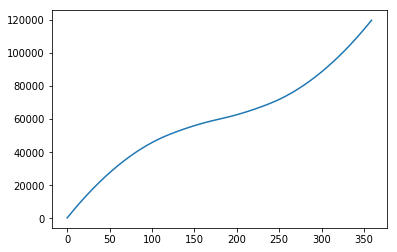

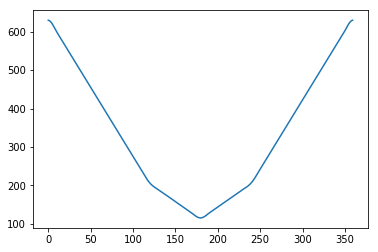

In [7]:
x_edge = np.zeros(361)

x_edge = AS_BoundariesFilt
#x_edge[315:] = AS_Boundaries[315:]
#x_edge[45:315] = AS_linear[45:315]

x = ((x_edge[1:] + x_edge[0:-1])/2)
delx = (x_edge[1:] - x_edge[0:-1])

print (np.shape(delx))
print (np.shape(x))
print (np.shape(x_edge))
print (delx)
plt.plot(x)
plt.show()
plt.plot(delx)


In [8]:

# The cross-shore (CS) variation - y-direction

CSy_size = 361
y_vary = np.arange(0,CSy_size,1)

In [9]:
#What I am using for the linear part

CSx_linear = (0,20,340,360)
CSy_linear = (0,10.0e+3,80.0e+3,90.0e+3)
CS_linear = np.interp(y_vary,CSx_linear,CSy_linear)
dely_CS_linear = (CS_linear[1:] - CS_linear[0:-1])

print (np.shape(dely_CS_linear))
#print (dely_CS_linear)


(360,)


(360,)


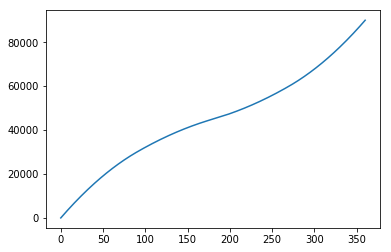

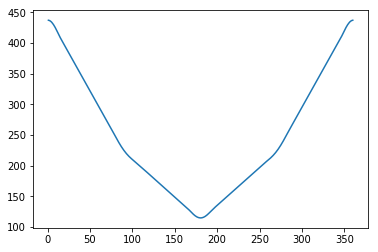

In [10]:
#What I am currently using for x0-40 and x340-360
CSx_Boundaries = (0,90,180,270,360)
CSy_Boundaries = (0,30.0e+3,45.0e+3,60.0e+3,90.0e+3)
cubfunc_y = interp1d(CSx_Boundaries,CSy_Boundaries,kind='quadratic', bounds_error=False)
CS_Boundaries = cubfunc_y(y_vary)

CS_BoundariesFilt=sg.savitzky_golay(CS_Boundaries, 31, 3) 
dely_CS_Boundaries = (CS_BoundariesFilt[1:] - CS_BoundariesFilt[0:-1])

print (np.shape(dely_CS_Boundaries))


plt.plot(y_vary,CS_Boundaries)
plt.show()
plt.plot(y_vary[1:],dely_CS_Boundaries)


(360,)
(360,)
(361,)


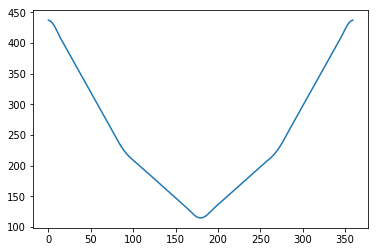

In [11]:

x_edge = AS_BoundariesFilt
y_edge = np.zeros(361)

y_edge=CS_BoundariesFilt

y = ((y_edge[1:] + y_edge[0:-1])/2)
dely = (y_edge[1:] - y_edge[0:-1])

print (np.shape(dely))
print (np.shape(y))
print (np.shape(y_edge))


#plt.plot(y)
plt.plot(dely)



In [29]:
total_fluid_depth = 1200.0


###############################################################################

x_wall = 120000.0
cR = 1000.0 #5000.0        # radius of curvature on upstream side
W = 500.0 #8300.0     # canyon width at half-length
Wsb = 1000.0 #13000.0   # canyon width at shelf-break 
L = 6400.0 #6400.0       # canyon length

y_base = 25950.0  
y_sb = 51220.0
y_bc = 26360.0
y_100 = 56130.0
y_50 = 64220.0
y_wall = 90000.0
y_coast = 72400.0

z_bottom = 100.0 
z_sb = 1050.0 
z_100 = 1100.0 
z_wall = 1180.0
z_bc = 200.0
z_50 = 1150.0
z_200 = 1000.0
z_400 = 800.0
z_600 = 600.0
z_800 = 400.0




#####
#set geometric parameters (see geometry.ods)
p = 4.0                    # saved as geometry.csv        
q = 6.0


# Grid size in x and y
x_size = 360
y_size = 360


d = bat.make_arbitrary_topo_smooth(total_fluid_depth,cR,W,Wsb,L,p,x,x_wall,y_edge,y_base,y_bc,y_sb,y_coast,z_bottom,
                                   z_bc,z_sb,z_wall)

print(d.shape)

d[:,CSy_size-1]=0

bathy=d[:,0:-1]

print(bathy.shape)



(360, 361)
(360, 360)


In [30]:
## Extend downstream shelf
nx_ext = 616
ny = 360

bathy_ext = np.empty((nx_ext,ny))
delx_ext = np.empty(nx_ext)

bathy_ext[:360,:]=bathy
delx_ext[0:360]=delx

bathy_ext[360:,:]=bathy[359,:]
delx_ext[360:]=630

x_ext = np.zeros(len(delx_ext))
for ii in range(1,len(delx_ext)):
    x_ext[ii] = x_ext[ii-1]+delx_ext[ii]


Text(0.5,1,'Depth (m) at canyon axis')

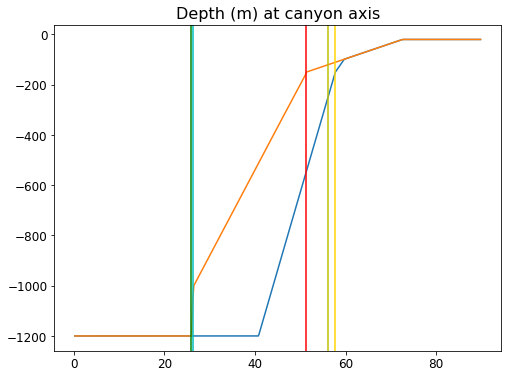

In [31]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1,1,figsize=(8,6))

CS = ax.plot(y/1000,bathy[180,:] )
CS = ax.plot(y/1000, bathy[300,:] )
ax.axvline(y_base/1000, color='g')
ax.axvline(y_sb/1000, color='r')
ax.axvline(y_bc/1000, color='c')
ax.axvline(y_100/1000, color='y')
ax.axvline((y_sb+L)/1000, color='gold')

plt.title('Depth (m) at canyon axis',fontsize=16)

<function matplotlib.pyplot.show>

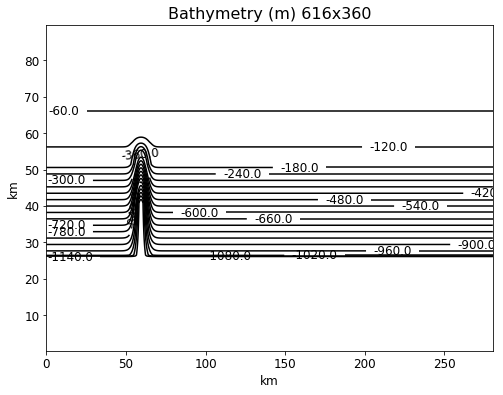

In [32]:
plt.rcParams['contour.negative_linestyle'] = 'solid'

fig = plt.figure(figsize=(8,6))

CS = plt.contour(x_ext/1000,y/1000,np.transpose(bathy_ext),20,colors='k' )

plt.clabel(CS, 
           inline=1,
           fmt='%1.1f',
           fontsize=12)

plt.xlabel('km')
plt.ylabel('km')
plt.title('Bathymetry (m) 616x360',fontsize=16)



plt.show


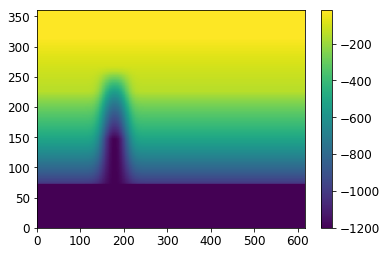

In [33]:
# saving binary files

dt = np.dtype('>f8')  # float 64 big endian

#tmpfile = "dely_%dx%d_NonUni_BarkleyLikeQuadExt.bin" %(nx_ext,360)
tmpfile = "dely_%dx%d_NonUni_BarkleyNarrowLike2QuadExt.bin" %(nx_ext,360)
fileobj = open(tmpfile,mode='wb')
dely.astype(dt).tofile(fileobj,"")
fileobj.close()

tmpfile = "delx_%dx%d_NonUni_BarkleyNarrowLike2QuadExt.bin" %(nx_ext,360)
fileobj = open(tmpfile, mode='wb')
delx_ext.astype(dt).tofile(fileobj,"")
fileobj.close()

tmpfile = "bathy_smooth_%dx%d_NonUni_BarkleyNarrowLike2QuadExt.bin"%(nx_ext,360)
fileobj = open(tmpfile, mode='wb')
dd=np.transpose(bathy_ext)
#dd=np.asfortranarray(bathy, dtype=dt)
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd)
plt.colorbar()


In [34]:
#Check that it works when read by Fortran

filename = 'bathy_smooth_%dx%d_NonUni_BarkleyNarrowLike2QuadExt.bin'%(nx_ext,360)
cc=np.fromfile(filename, dtype=dt)
np.shape(cc)

filename2 = 'bathy_smooth_%dx%d_NonUni_BarkleyLikeQuadExt.bin'%(nx_ext,360)
cc2=np.fromfile(filename2, dtype=dt)
np.shape(cc2)



(221760,)

In [35]:
bF=np.reshape(cc,[nx_ext,360],'F') # F to read in Fortran order
bF2=np.reshape(cc2,[nx_ext,360],'F') # F to read in Fortran order



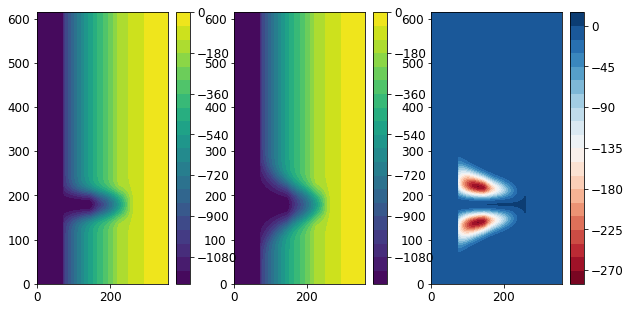

In [36]:
fig,ax = plt.subplots(1,3, figsize=(10,5))

pc = ax[0].contourf(bF, 20)
plt.colorbar(pc,ax=ax[0])

pc2 = ax[1].contourf(bF2, 20)
plt.colorbar(pc2,ax=ax[1])

pc2 = ax[2].contourf(bF2-bF, 20, cmap='RdBu')
plt.colorbar(pc2,ax=ax[2])

 Parameter definitions:
 --------------------
 
  y_wall = the length of the ocean basin (y-axis)(going from 0=deep ocean m high values = coast
  
  x_wall = the width of the ocean basin (x-axis)
  
  y_base = the distance where the slope begins to rise from the bottom
  
  y_bc = the distance to the canyon mouth
  
  y_sb = the distance of the shelf break
  
  y_100 = the distance to the 100m isobath
  
  y_50 = the distance to the 50m isobath
 
 y_coast = the distance to the "coast" where topography stops increasing, but depth NOT =0

z_bottom = depth of the "deep ocean"; z is measured from the bottom up

z_bc = depth of the 1000 m contour

z_800 = depth of the 800 m contour

z_600 = depth of the 600 m contour

z_400 = depth of the 400 m contour

z_200 = depth of the 200 m contour

z_sb = shelf break depth (150m)

z_100 = depth of the 100 m contour

z50 = depth of the 50 m contour

z_wall = the depth of the topography beyond the y_coast variable (i.e. z_wall NOT = total fluid depth)

cR = the radius of curvature at the shelf break depth

W = the width at half the length at the shelf break depth

Wsb = the width at the shelf break

L = the length of the canyon

p,q = geometric parameters used to help shape the canyon see geometry.ods



In [19]:
6400+ 6400*(0.5)

9600.0